# Explore Wavelet Transform with pywt

In order to acquire a good theoretical foundation on the topic of wavelet transform, I found useful information here: 
    
    https://www.youtube.com/watch?v=i0rPaAXjJoI

    Rubin H. Landau et al., 2015, Computational Physics (third edition), Wiley-VCH, pp. 307-319.

I found it helpful to familiarize myself with the Concept of Fourier Transform first. I found useful information here: 
    
    https://www.youtube.com/watch?v=spUNpyF58BY
        
    James H. McClellan et al., 2003, Signal Processing First (International Edition), Pearson Education International, pp. 1-50.
Many useful algorithms can be found here: https://github.com/PyWavelets/pywt/blob/master/demo/ some of which are used in the present notebook. 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import pywt
#from intra_event_processing.data_processing.autocorrelation import autocorr_non_norm, autocorr_norm
#from intra_event_processing.data_visualization.show_dic_structure import show_structure

## Continuous wavelet transform: 

### Create some test data:

#### Two sine wave signals, the second with a frequency four times as high as the first one:

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


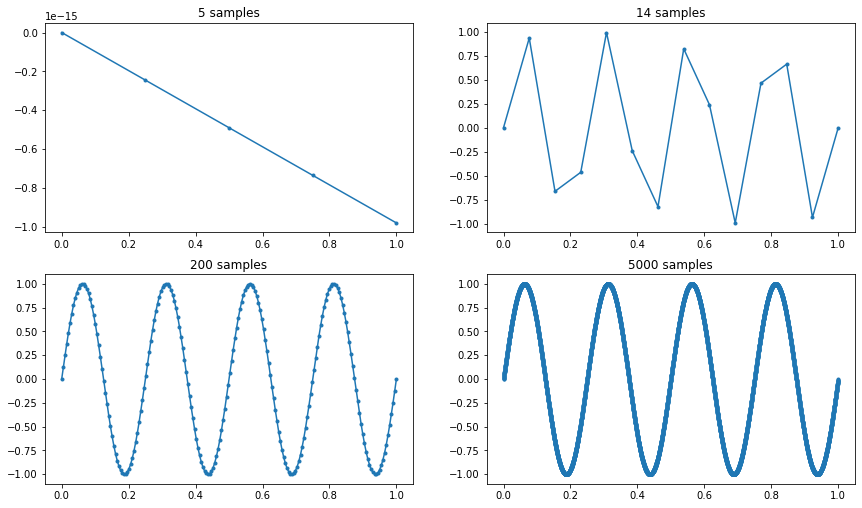

In [2]:
f_1 = 4
w = 2. * np.pi * f_1
time_interval = 1
fig = pylab.figure()
signals_lowfreq = {}
for i, samples in enumerate((5, 14, 200, 5000)):
    pylab.subplot(2, 2, i+1)
    pylab.title('%i samples'%samples)
    t = np.linspace(0, time_interval, samples)
    y = np.sin(w * t)
    data_points = str(samples) + '_points'
    signals_lowfreq[data_points] = y
    pylab.plot(t, y, '.-')
    plt.subplots_adjust(bottom=0.4, right=2, top=2)
fig.show()

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


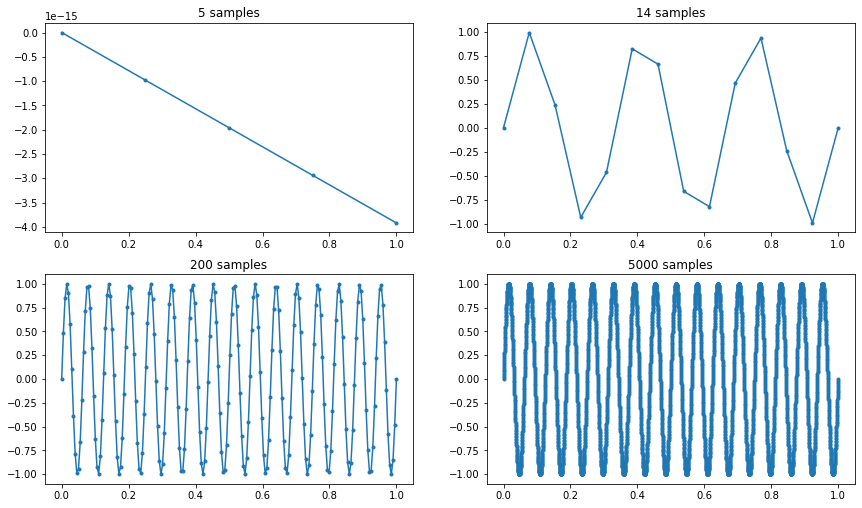

In [3]:
f_2 = f_1*4
w = 2. * np.pi * f_2
time_interval = 1
fig = pylab.figure()
signals_highfreq = {}
for i, samples in enumerate((5, 14, 200, 5000)):
    pylab.subplot(2, 2, i+1)
    pylab.title('%i samples'%samples)
    t = np.linspace(0, time_interval, samples)
    y = np.sin(w * t)
    data_points = str(samples) + '_points'
    signals_highfreq[data_points] = y
    pylab.plot(t, y, '.-')
    plt.subplots_adjust(bottom=0.4, right=2, top=2)
fig.show()

In [4]:
sine_wave_low = signals_lowfreq['200_points']
sine_wave_high = signals_highfreq['200_points']

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


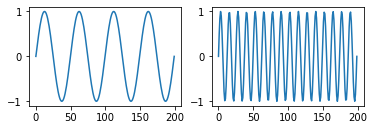

In [5]:
pylab.subplot(2,2,1)
pylab.plot(sine_wave_low)
pylab.subplot(2,2,2)
pylab.plot(sine_wave_high)
fig.show()

#### A mixed sine wave signal: sum up two frequencies

In [6]:
signal_mixed_total = signals_lowfreq['200_points'] + signals_highfreq['200_points']

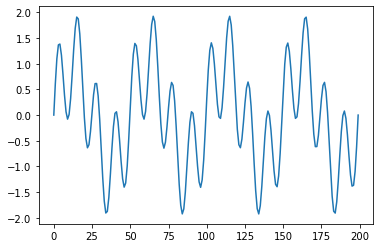

In [7]:
plt.plot(signal_mixed_total)

#### Constant zero signal and a concatenated signal: First part constant zero, second part high frequency sine wave:

In [8]:
zero_streak = np.zeros(100)
zero_high = np.concatenate((zero_streak,signals_highfreq['200_points'][100:]))
len(zero_high)

200

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


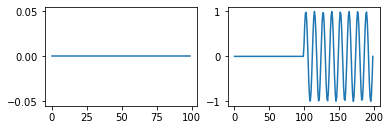

In [9]:
pylab.subplot(2,2,1)
pylab.plot(zero_streak)
pylab.subplot(2,2,2)
pylab.plot(zero_high)
fig.show()

#### Concatenated two parts signal: Low frequency and mixed frequency (low and high) sine wave

In [10]:
signal_mixed_half = signals_lowfreq['200_points'] + zero_high

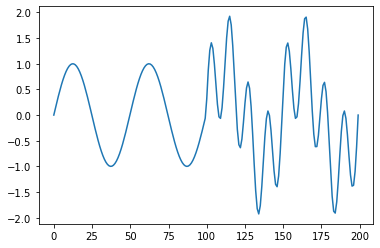

In [11]:
plt.plot(signal_mixed_half)

#### Visualize gaussian wavelet: 

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


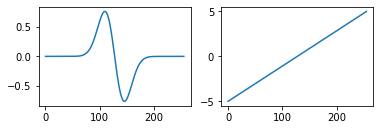

In [12]:
w = 'gaus1'
w = pywt.ContinuousWavelet(w)
dir(w)
for i in range(0, len(w.wavefun())):
    index = i+1
    pylab.subplot(2,2,index)
    pylab.plot(w.wavefun()[i])
fig.show()

### Applying continuous wavelet transform to the slow sine wave signal:

#### Specify the imput data, the scales and the wavelet type:

Scales define how much the wavelet will be streched or squished: It affects frequency in the following way: freq = 2*pi/s

In [13]:
scales = np.arange(1, 11)
#scales = np.arange(1,3)

In [14]:
scales

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

#### Execute wavelet transform: 

In [15]:
coeffs_1, freqs_1 = pywt.cwt(sine_wave_low, scales, 'gaus1')

Two outputs are produced: An array of the different frequencies defined by the different scales (number of output frequencies equals number of input scales), and array of coefficient arrays. Each coefficient array corresponds one wavelet frequency and scale (number of arrays equal numbers of input scales). Each of these coefficient-arrays contains coefficients, the number of coefficients in each array equals the number of data points in the input data. Each coefficient corresponds to a tau value indicating the location of the wavelet and the coefficient value itself is a measure of the similarity of the signal and the wavelet at that specific location (obtained by convolution of that portion of the signal with the wavelet). 

In [16]:
type(freqs_1)

numpy.ndarray

In [17]:
print(len(scales))
print(len(coeffs_1))
print(len(freqs_1))

10
10
10


In [18]:
print(len(coeffs_1[0]))
print(len(sine_wave_low))

200
200


#### Visualize results: 

The graph below shows the frequency of the signal at different scales, i.e. the frequencies of the signal as revealed by convolution with the wavelet at different scales:

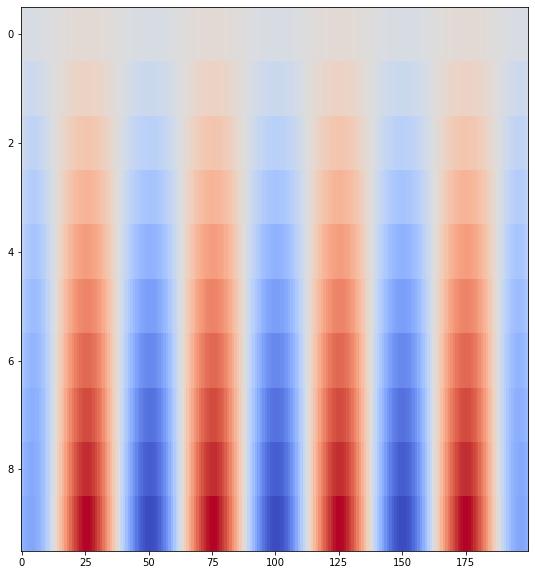

In [19]:
plt.figure(1, figsize=(20, 10))
plt.subplot(121)
plt.imshow(coeffs_1, cmap='coolwarm', aspect='auto')
plt.show()

Plotting an coefficient array reveales a similar pattern as the input signal. This makes sense as the wavelet has a sine shape and the convolution with the signal yields the highest values as the wavelet is in phase with the signal: 

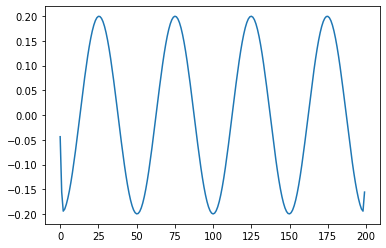

In [20]:
plt.plot(coeffs_1[0])

Plotting the frequencies shows a decrease. This makes sense as the arrays of frequencies corresponds to an array of increasing scales.

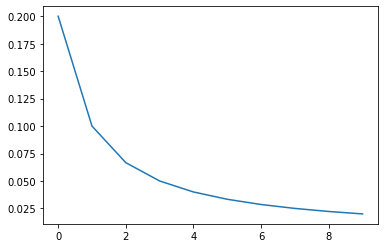

In [21]:
plt.plot(freqs_1)

### Applying continuous wavelet transform to the concatenated two-part-signal: low freq sine wave and mixed low-and-high-freq-sine-wave:

In [22]:
coeffs_new_1, freqs_new_1 = pywt.cwt(signal_mixed_half, scales, 'gaus1')

#### Visualize results:

The plot below shows that the low frequency is present throughout the signal whereas the high frequency is only present in the second half. It also shows that the high frequency signal can only be revealed at lower scales (i.e. high frequency wavelets): 

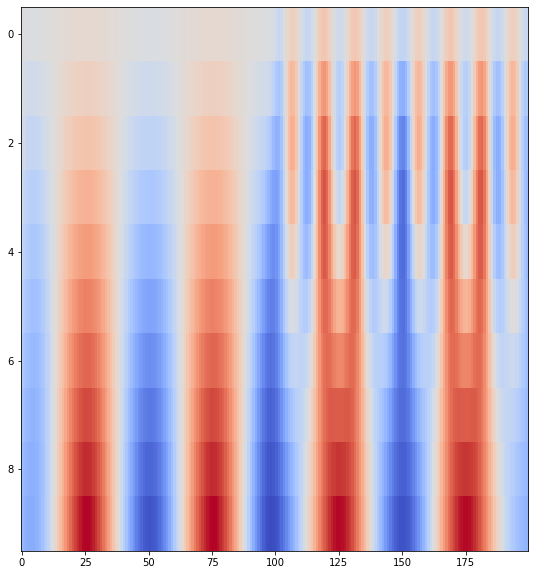

In [23]:
plt.figure(1, figsize=(20, 10))
plt.subplot(121)
plt.imshow(coeffs_new_1, cmap='coolwarm', aspect='auto')
plt.show()

The high scale coefficients capture the shape of the low freq sine wave (amplitude is higher because it is a convolution). The low frequency sine wave is present in the entire signal: 

In [24]:
freqs_new_1[9]

0.02

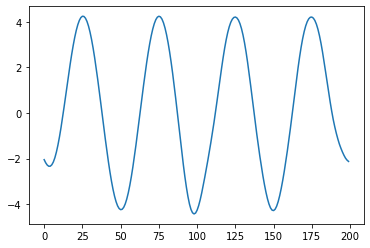

In [25]:
plt.plot(coeffs_new_1[9])

The low scale coefficients capture the shape of the high frequency sine wave. They are only present in the second half of the signal: 

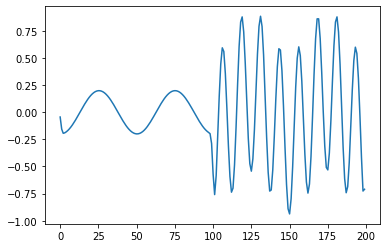

In [26]:
plt.plot(coeffs_new_1[0])

In [27]:
freqs_new_1[0]

0.2

### Questions:

Why is the high frequency of the wavelet not at all visible in the first half of the coefficient trace? Convoluting a high frequency wave with a low frequency signal would not make the high frequency disappear completely, right? <br>
<br>
And why is the amplitude so much smaller than in the original signal?

### Possible answer to the above questions:
The integral of the wavelet is zero. Depending on the shape of the wavelet and the signal the convolution of the two can result to zero. Also, the convolution is normalized by dividing it by sqrt(s), s being the scale of the wavelet. Is this correct?

## Discrete wavelet transform: 

### Create different types of test data: 

In [28]:
ecg = pywt.data.ecg()

data_constant = np.repeat(2, 1000)

data1 = np.arange(1, 1025)

data2 = np.concatenate((np.arange(1, 400),
                        np.arange(398, 600),
                        np.arange(601, 1024)))

data3 = np.concatenate((np.arange(1,300), np.arange(350,1000)))

x = np.linspace(0.082, 2.128, num=1024)[::-1]
data4 = np.sin(40 * np.log(x)) * np.sign((np.log(x)))



c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


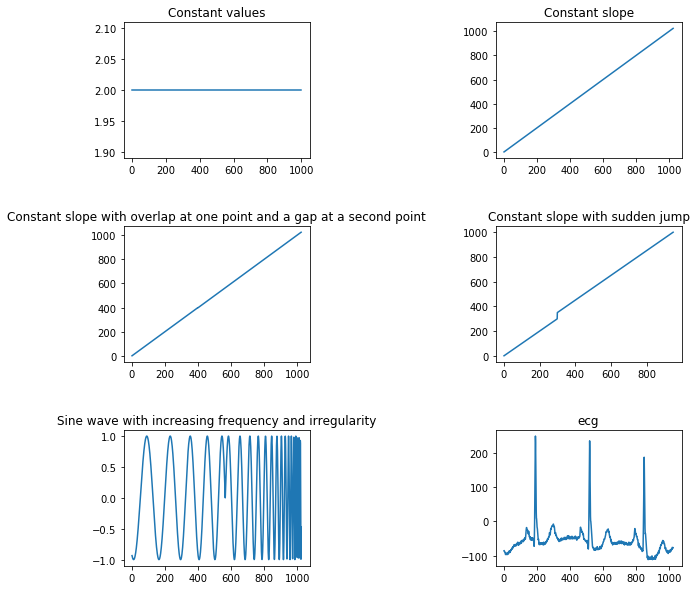

In [29]:
#fig, axes = plt.subplots(nrows=3, ncols=2)
#fig.tight_layout()
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=0.5)
plt.subplot(3,2,1)
plt.title('Constant values')
plt.plot(data_constant)
plt.subplot(3,2,2)
plt.title('Constant slope')
plt.plot(data1)
plt.subplot(3,2,3)
plt.title('Constant slope with overlap at one point and a gap at a second point')
plt.plot(data2)
plt.subplot(3,2,4)
plt.title('Constant slope with sudden jump')
plt.plot(data3)
plt.subplot(3,2,5)
plt.title('Sine wave with increasing frequency and irregularity')
plt.plot(data4)
plt.subplot(3,2,6)
plt.title('ecg')
plt.plot(ecg)
fig.show()

In [30]:
data2[599:603]

array([598, 599, 601, 602])

### Visualize the haar wavelet:

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


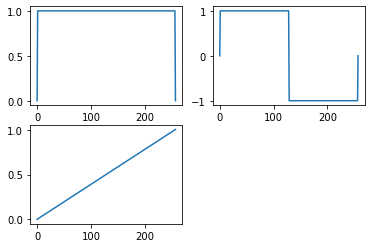

In [31]:
w = 'haar'
w = pywt.Wavelet(w)

for i in range(0, len(w.wavefun())):
    index = i+1
    pylab.subplot(2,2,index)
    pylab.plot(w.wavefun()[i])
fig.show()


### Apply wavelet transform:

In [32]:
def dwt_steps(a, w, mode, num_steps):
    ca = []
    cd = []
    for i in range(num_steps + 1):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        cd.append(d)
    return ca, cd

In [33]:
"""Decompose and plot a signal S.
S = An + Dn + Dn-1 + ... + D1
"""

mode = pywt.Modes.smooth

ca_const, cd_const = dwt_steps(data_constant, w, mode, 4)
ca_1, cd_1 = dwt_steps(data1, w, mode, 4)
ca_2, cd_2 = dwt_steps(data2, w, mode, 4)
ca_3, cd_3 = dwt_steps(data3, w, mode, 4)
ca_4, cd_4 = dwt_steps(data4, w, mode, 4)

### Discrete convolution and discrete scaling steps:
Contrary to continuous wavelet transform, in discrete wavelet transform convolution of the wavelet with the signal is not performed by sliding the wavelet continuously along the signal. Instead, one can imagine wavelet copies being lined up along the signal one next to another. 
Scaling steps are discrete as well in that the length of the wavelet is doubled every round (at least in this concrete example). 

#### The Haar wavelet and constant values:
The haare wavelet detects sudden decreases (and will detect sudden increases as negative changes). 
Hence, convolution with a trace of constant values will yield a result of zero: 

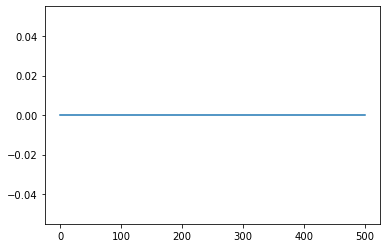

In [34]:
plt.plot(cd_const[0])

### Haar wavelet and constant slope:
Convolution with a constantly (linearly) increasing signal will yield a constant negative value.
Changes in the response are due to computer inacuracies and disappear when the numbers are rounded appropriately:

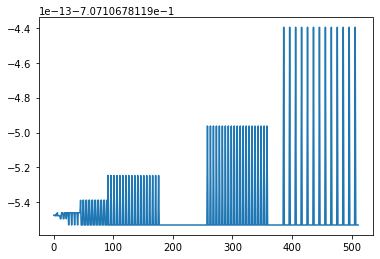

In [35]:
plt.plot(cd_1[0])

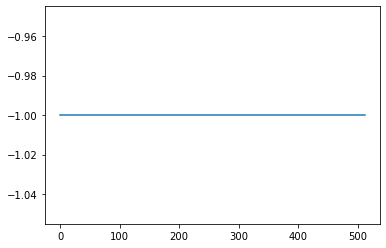

In [36]:
plt.plot(np.around(cd_1[0]))

### Haar wavelet and irregularities:
The Haar wavelet will detect sudden changes in an otherwise smooth linear signal such as repeating values, gaps or sudden jumps: 

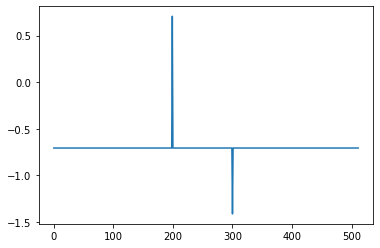

In [37]:
plt.plot(np.around(cd_2[0], 11))

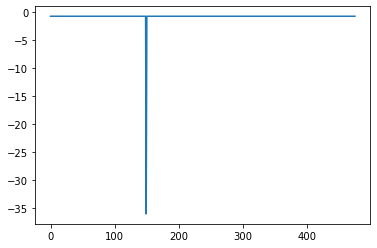

In [38]:
plt.plot(np.around(cd_3[0], 11))

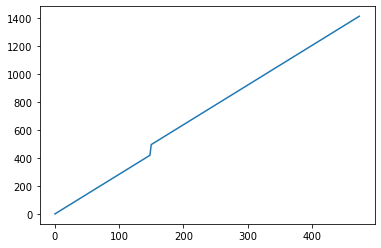

In [39]:
plt.plot(ca_3[0])

### Haar wavelet and sine wave:
The Haar wavelet will reveal changing slopes:

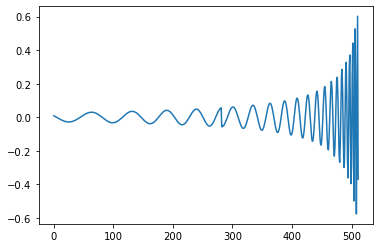

In [40]:
plt.plot(cd_4[0])

### Details and approximation:
The cd object is a trace of all the convolution values. Since the wavelet was two data points long at its smalles scale, the first array of the cd object is half the length of the original signal:

In [41]:
print(len(cd_1[0]))
print(len(data1))

512
1024


At every iteration the scale of the wavelet is doubled and hence the length of the output is halfed:

In [42]:
print(len(cd_1[1]))
print(len(cd_1[2]))
print(len(cd_1[3]))
print(len(cd_1[4]))

256
128
64
32


The ca object contains the convolution results of the low pass filter. The data trace is convoluted with the low-pass filter. The result is a down-sampled data trace with higher values. In other words, the signal is convoluted with a "step" wavelet (two consecutive values of 1), which means two consecutive values are picked up (multiplied by 1), then added together and divided by the square root of 2^j, where 2^j is the scale s that defines the frequency of the wavelet. Then the same procedure is repeated for the next two values and so on: 

In [43]:
print(data1[0:6])
print(ca_1[0][0:3])
print(1/np.sqrt(2) + 2/np.sqrt(2))
print(3/np.sqrt(2) + 4/np.sqrt(2))
print(5/np.sqrt(2) + 6/np.sqrt(2))

[1 2 3 4 5 6]
[2.12132034 4.94974747 7.77817459]
2.1213203435596424
4.949747468305832
7.778174593052022


The process explained above is repeated at every iteration: For scale s = 2^j, 2^j consecutive values in data1 are added up and then divided by sqrt(2^j). The result is then stored in ca_1[j-1].  So, for j=2, four consecutive values are added up and divided by 2:

In [44]:
print(ca_1[0][0:4])
print(ca_1[1][0:4])
print(data1[0]/2 + data1[1]/2 + data1[2]/2 + data1[3]/2)
print(data1[4]/2 + data1[5]/2 + data1[6]/2 + data1[7]/2)
print(data1[8]/2 + data1[9]/2 + data1[10]/2 + data1[11]/2)

[ 2.12132034  4.94974747  7.77817459 10.60660172]
[ 5. 13. 21. 29.]
5.0
13.0
21.0


The same result is obtained by adding up 2^(j-1) values of ca_1[j-2] and dividing them by sqrt(2^(j-1): 

In [45]:
print(ca_1[0][0]/np.sqrt(2) + ca_1[0][1]/np.sqrt(2))
print(ca_1[0][2]/np.sqrt(2) + ca_1[0][3]/np.sqrt(2))
print(ca_1[0][4]/np.sqrt(2) + ca_1[0][5]/np.sqrt(2))

5.0
13.0
21.0


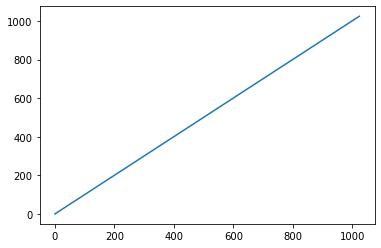

In [46]:
plt.plot(data1)

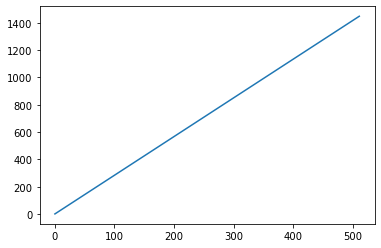

In [47]:
plt.plot(ca_1[0])

The cd_1 object contains the results obtained by the convolution of the signal with the haar wavelet. The convolution is carried out - as was the convolution with the low-pass filter - first on the two consecutive values, then on the next two consecutive values, and so on: 

In [48]:
print(cd_1[0][0:20])
print(data1[0]/np.sqrt(2) - data1[1]/np.sqrt(2))
print(data1[2]/np.sqrt(2) - data1[3]/np.sqrt(2))

[-0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678
 -0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678
 -0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678
 -0.70710678 -0.70710678]
-0.7071067811865475
-0.7071067811865475


Since the haar wavelet detects negative changes and the signal at hand shows positive change (constant positive slope i.e. a linearily increasing function), the convolution with the haar wavelet here yields a constant negative value: 

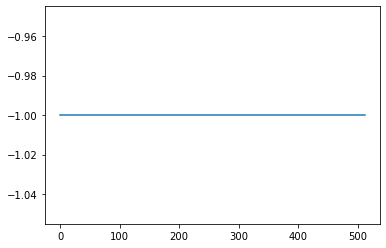

In [49]:
plt.plot(np.around(cd_1[0][0:1000]))

The below code verifies the above explanation for ca_1[0] and cd_1[0]:

In [50]:
index = 0
ca_values_check_1 = []
for iteration in range(1,(int(len(ca_1[0])/2))):
    convolution_value = ca_1[0][index]/np.sqrt(2) + ca_1[0][index + 1]/np.sqrt(2)
    ca_values_check_1.append(convolution_value)
    index = index + 2 

In [51]:
index = 0
cd_values_check_1 = []
for iteration in range(1,(int(len(ca_1[0])/2))):
    convolution_value = ca_1[0][index]/np.sqrt(2) - ca_1[0][index + 1]/np.sqrt(2)
    cd_values_check_1.append(convolution_value)
    index = index + 2 

In [52]:
np.array_equal(np.around(ca_values_check_1, 2)[0:len(ca_values_check_1)], np.around(ca_1[1], 2)[0:len(ca_values_check_1)])

True

In [53]:
np.array_equal(np.around(cd_values_check_1, 2)[0:len(cd_values_check_1)], np.around(cd_1[1], 2)[0:len(cd_values_check_1)])

True

### Reconstruction step:
Following code taken from: https://stackoverflow.com/questions/45051106/multilevel-partial-wavelet-reconstruction-with-pywavelets

In [54]:
rec_a_1 = []
rec_d_1 = []

for i, coeff in enumerate(ca_1):
    coeff_list = [coeff, None] + [None] * i
    rec_a_1.append(pywt.waverec(coeff_list, w))

for i, coeff in enumerate(cd_1):
    coeff_list = [None, coeff] + [None] * i
    rec_d_1.append(pywt.waverec(coeff_list, w))

In [55]:
rec_a_1 = []
rec_d_1 = []

for i, coeff in enumerate(ca_1):
    coeff_list = [coeff, None] + [None] * i
    rec_a_1.append(pywt.waverec(coeff_list, w))

In [56]:
coeff_list

[array([  93.33809512,  274.3574311 ,  455.37676708,  636.39610307,
         817.41543905,  998.43477504, 1179.45411102, 1360.473447  ,
        1541.49278299, 1722.51211897, 1903.53145495, 2084.55079094,
        2265.57012692, 2446.58946291, 2627.60879889, 2808.62813487,
        2989.64747086, 3170.66680684, 3351.68614282, 3532.70547881,
        3713.72481479, 3894.74415078, 4075.76348676, 4256.78282274,
        4437.80215873, 4618.82149471, 4799.84083069, 4980.86016668,
        5161.87950266, 5342.89883865, 5523.91817463, 5704.93751061]),
 None,
 None,
 None,
 None,
 None]

In [57]:
len(ca_1[0])

512

The pywt.dwt() function reconstructs a signal of the same length as the original signal from the ca object. The ca objects from early iterations (small scale wavelets) will yield a more complete reconstruction: 

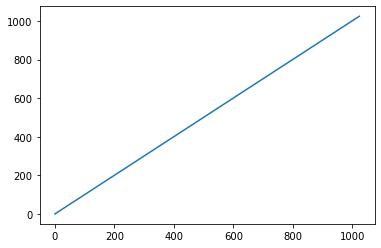

In [58]:
plt.plot(data1)

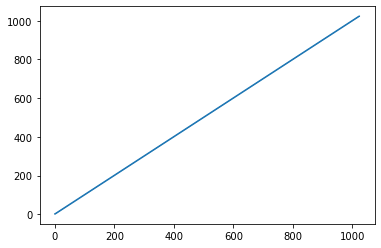

In [59]:
plt.plot(rec_a_1[0])

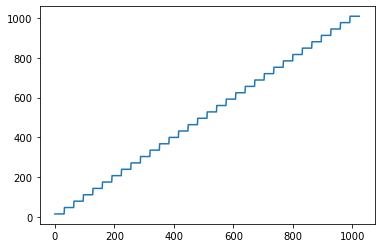

In [60]:
plt.plot(rec_a_1[4])

The pywt.dwt() function reconstructs the convolution of the original signal with wavelet. Plotting shows the convolution results represented as areas under the curve: 

### The concepts explained above can be used to detect irregularities in different signals:

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


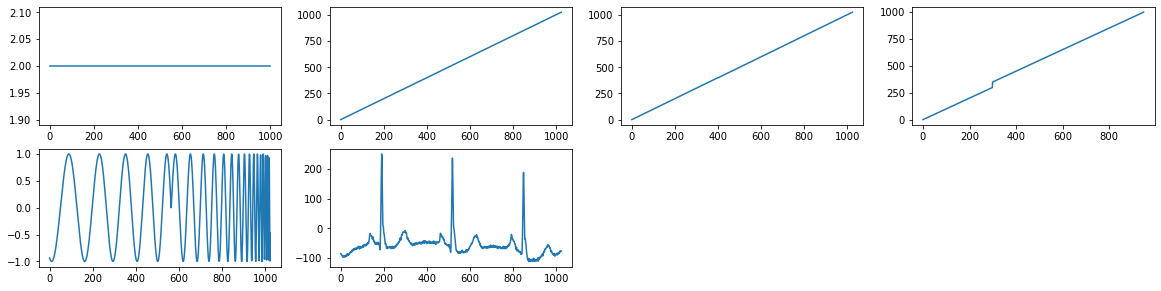

In [62]:
fig = plt.figure(figsize=(20,10))
pylab.subplot(4,4,1)
pylab.plot(data_constant)
pylab.subplot(4,4,2)
pylab.plot(data1)
pylab.subplot(4,4,3)
pylab.plot(data2)
pylab.subplot(4,4,4)
pylab.plot(data3)
pylab.subplot(4,4,5)
pylab.plot(data4)
pylab.subplot(4,4,6)
pylab.plot(ecg)
fig.show()

The following code is taken from: https://github.com/PyWavelets/pywt/blob/master/demo/dwt_signal_decomposition.py

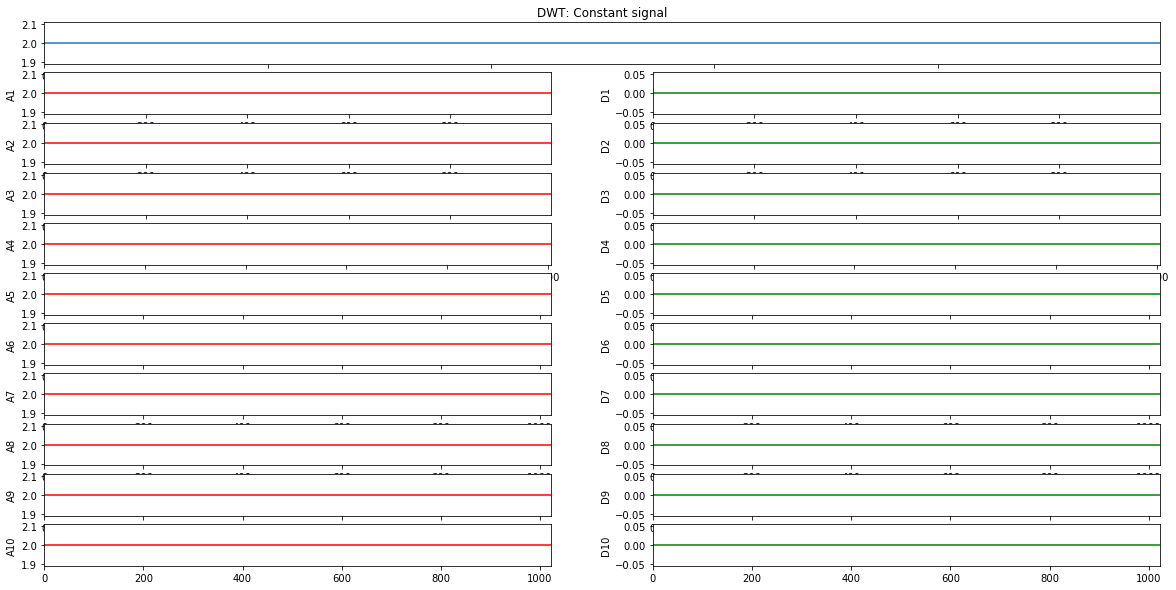

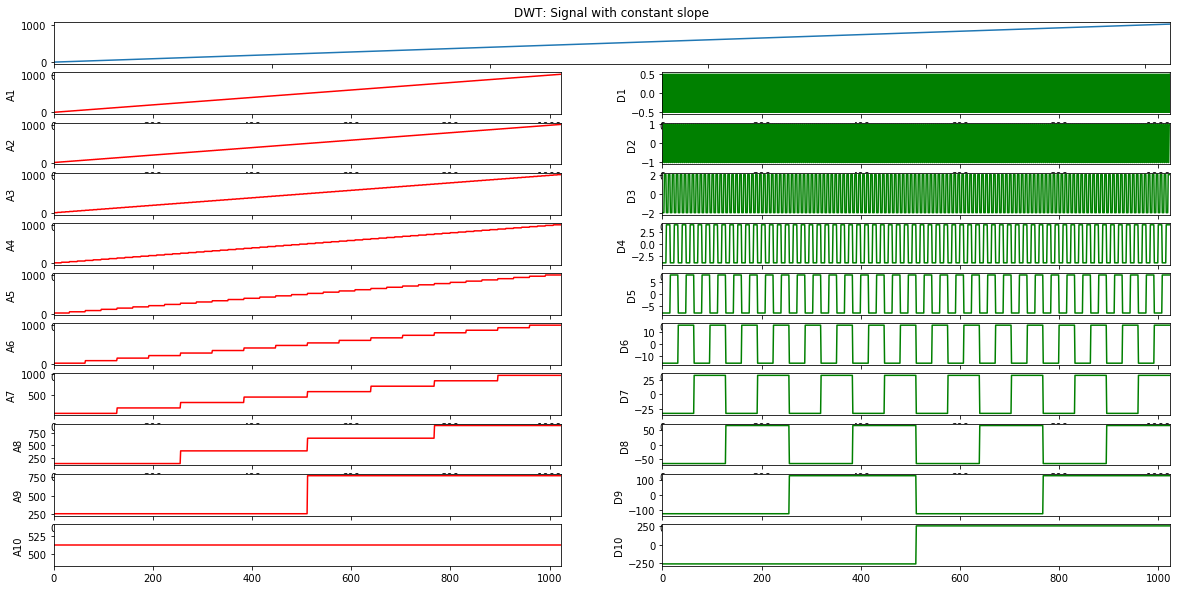

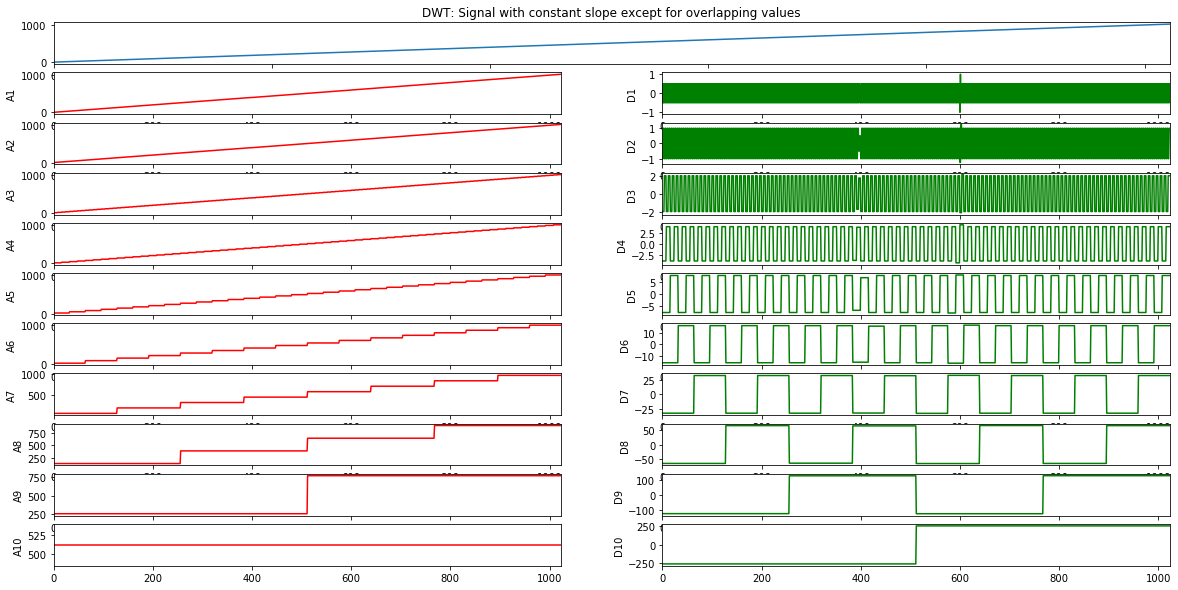

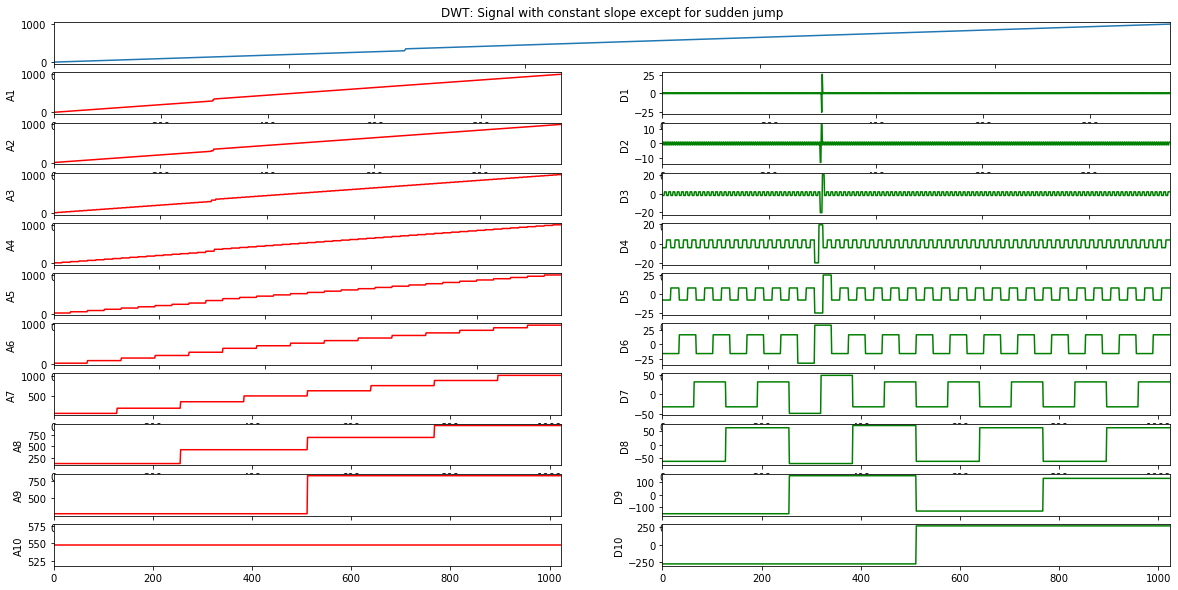

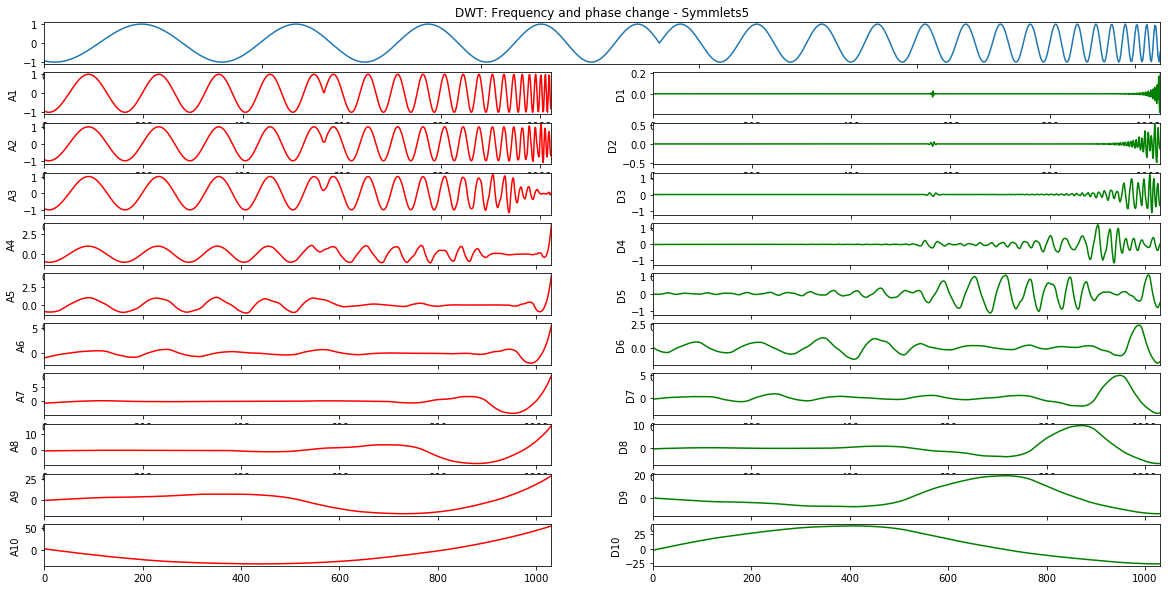

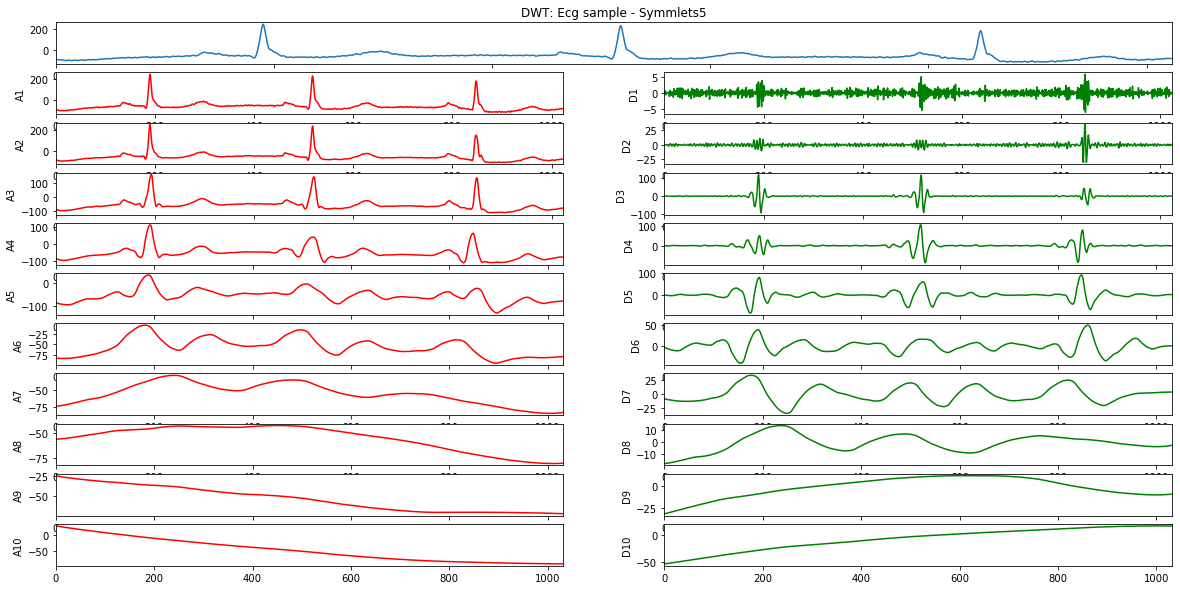

In [63]:


mode = pywt.Modes.smooth

def plot_signal_decomp(data, w, title):
    """Decompose and plot a signal S.
    S = An + Dn + Dn-1 + ... + D1
    """
    w = pywt.Wavelet(w)
    a = data
    ca = []
    cd = []
    for i in range(10):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        cd.append(d)

    rec_a = []
    rec_d = []

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))

    for i, coeff in enumerate(cd):
        coeff_list = [None, coeff] + [None] * i
        rec_d.append(pywt.waverec(coeff_list, w))

    fig = plt.figure(figsize=(20,10))
    ax_main = fig.add_subplot(len(rec_a) + 1, 1, 1)
    ax_main.set_title(title)
    ax_main.plot(data)
    ax_main.set_xlim(0, len(data) - 1)

    for i, y in enumerate(rec_a):
        ax = fig.add_subplot(len(rec_a) + 1, 2, 3 + i * 2)
        ax.plot(y, 'r')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("A%d" % (i + 1))

    for i, y in enumerate(rec_d):
        ax = fig.add_subplot(len(rec_d) + 1, 2, 4 + i * 2)
        ax.plot(y, 'g')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("D%d" % (i + 1))


plot_signal_decomp(data_constant, 'haar', "DWT: Constant signal")
plot_signal_decomp(data1, 'haar', "DWT: Signal with constant slope")
plot_signal_decomp(data2, 'haar', "DWT: Signal with constant slope except for overlapping values")
plot_signal_decomp(data3, 'haar', "DWT: Signal with constant slope except for sudden jump")
plot_signal_decomp(data4, 'sym5',
                   "DWT: Frequency and phase change - Symmlets5")
plot_signal_decomp(ecg, 'sym5', "DWT: Ecg sample - Symmlets5")


plt.show()

### How to decompose a signal into components containing different frequencies:

#### Create a signal by adding the two above signals: constant low frequency plus a mixed signal (constant in the first part and high frequency in the second part):

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


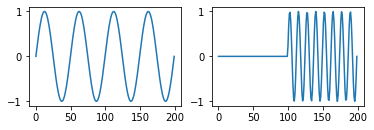

In [64]:
sine_wave_low = signals_lowfreq['200_points']
sine_wave_high = signals_highfreq['200_points']

pylab.subplot(2,2,1)
pylab.plot(sine_wave_low)
pylab.subplot(2,2,2)
pylab.plot(zero_high)
fig.show()

In [65]:
signal_mixed_half = signals_lowfreq['200_points'] + zero_high

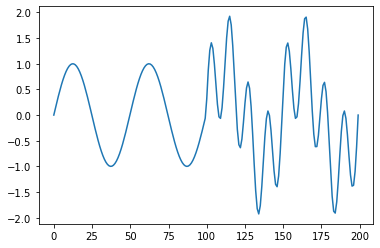

In [66]:
plt.plot(signal_mixed_half)

#### Task: Decompose the mixed signal (signal_mixed_half) in order to reconstract the original low frequency signal (sine_wave_low):

Visualize frequency composition using discrete wavelet transform: 

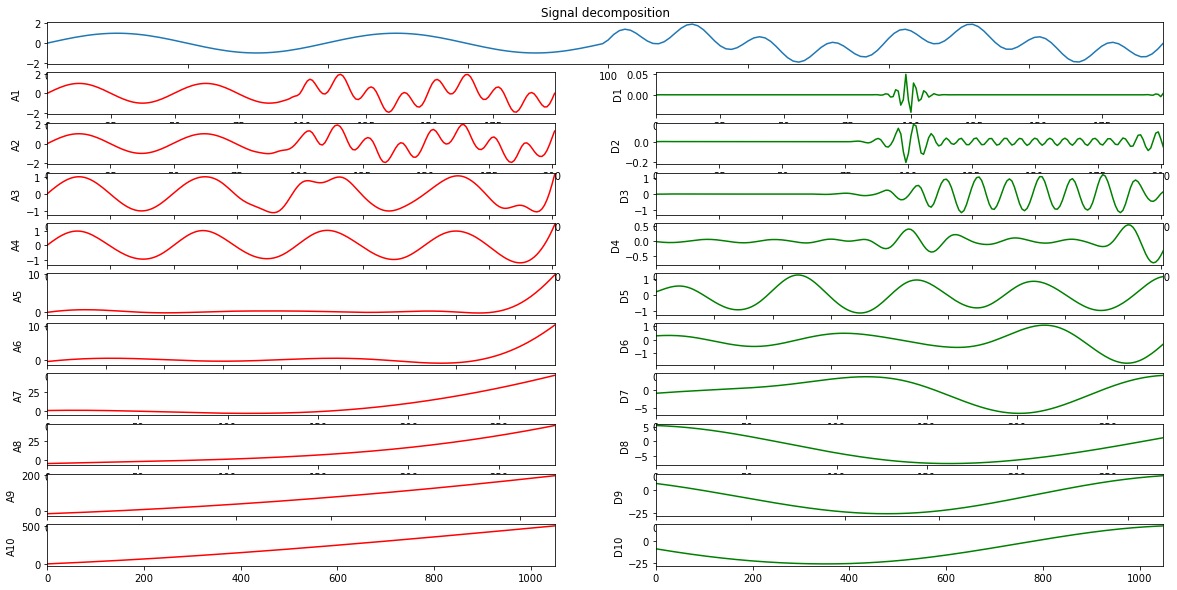

In [67]:
plot_signal_decomp(signal_mixed_half, 'sym14', "Signal decomposition")

#### Decomposing the signal using discrete wavelet transform:
The code below executes the same operation that is visualized above.

In [68]:
def dwt_steps(a, w, mode, num_steps):
    ca = []
    cd = []
    for i in range(num_steps + 1):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        cd.append(d)
    return ca, cd

In [69]:
w = 'sym14'
mode = pywt.Modes.smooth
ca, cd = dwt_steps(signal_mixed_half, w, mode, 10)

#### Reonstructing the signal from the estimates:

In [70]:
rec_a = []
rec_d = []

for i, coeff in enumerate(ca):
    coeff_list = [coeff, None] + [None] * i
    rec_a.append(pywt.waverec(coeff_list, w))

for i, coeff in enumerate(cd):
    coeff_list = [None, coeff] + [None] * i
    rec_d.append(pywt.waverec(coeff_list, w))

In [71]:
low_freq_rec = rec_a[2][:200]

In [72]:
high_freq_rec = signal_mixed_half - low_freq_rec

#### The two signal components reconstructed by wavelet transform look quite similar to the two original signal components that were used to create the mixed signal: 

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


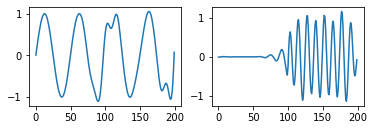

In [73]:
pylab.subplot(2,2,1)
pylab.plot(low_freq_rec)
pylab.subplot(2,2,2)
pylab.plot(high_freq_rec)
fig.show()

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


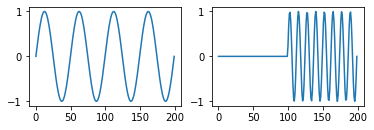

In [74]:
pylab.subplot(2,2,1)
pylab.plot(sine_wave_low)
pylab.subplot(2,2,2)
pylab.plot(zero_high)
fig.show()

### Visualizing different wavelet types: 

In [75]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


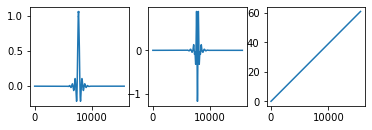

In [76]:
w = 'dmey'
w = pywt.Wavelet(w)

for i in range(0, len(w.wavefun())):
    index = i+1
    pylab.subplot(2,3,index)
    pylab.plot(w.wavefun()[i])
fig.show()

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


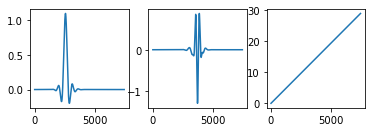

In [77]:
w = 'coif5'
w = pywt.Wavelet(w)

for i in range(0, len(w.wavefun())):
    index = i+1
    pylab.subplot(2,3,index)
    pylab.plot(w.wavefun()[i])
fig.show()

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


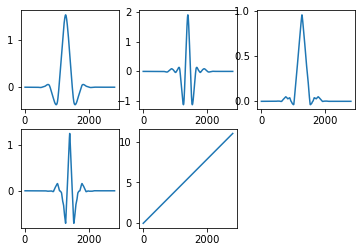

In [78]:
w = 'rbio5.5'
w = pywt.Wavelet(w)

for i in range(0, len(w.wavefun())):
    index = i+1
    pylab.subplot(2,3,index)
    pylab.plot(w.wavefun()[i])
fig.show()

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


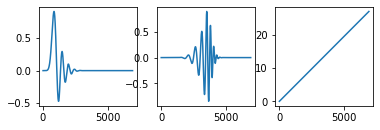

In [79]:
w = 'db14'
w = pywt.Wavelet(w)

for i in range(0, len(w.wavefun())):
    index = i+1
    pylab.subplot(2,3,index)
    pylab.plot(w.wavefun()[i])
fig.show()

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


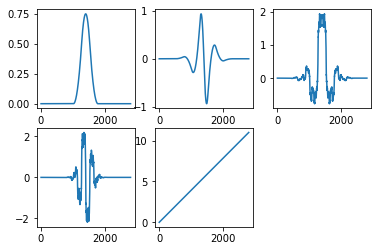

In [80]:
w = 'rbio3.5'
w = pywt.Wavelet(w)

for i in range(0, len(w.wavefun())):
    index = i+1
    pylab.subplot(2,3,index)
    pylab.plot(w.wavefun()[i])
fig.show()

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


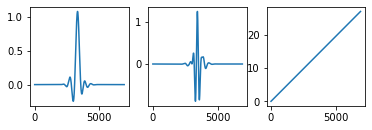

In [81]:
w = 'sym14'
w = pywt.Wavelet(w)

for i in range(0, len(w.wavefun())):
    index = i+1
    pylab.subplot(2,3,index)
    pylab.plot(w.wavefun()[i])
fig.show()

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


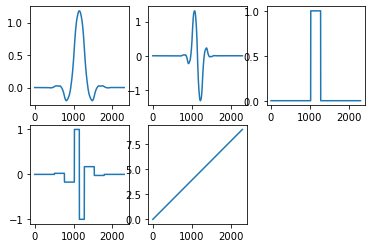

In [82]:
w = 'bior1.5'
w = pywt.Wavelet(w)

for i in range(0, len(w.wavefun())):
    index = i+1
    pylab.subplot(2,3,index)
    pylab.plot(w.wavefun()[i])
fig.show()

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


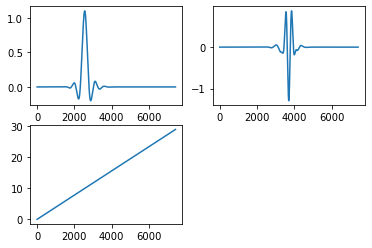

In [83]:
w = 'coif5'
w = pywt.Wavelet(w)

for i in range(0, len(w.wavefun())):
    index = i+1
    pylab.subplot(2,2,index)
    pylab.plot(w.wavefun()[i])
fig.show()

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


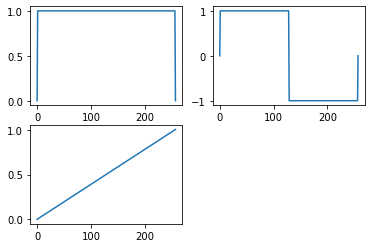

In [95]:
w = 'haar'
w = pywt.Wavelet(w)

for i in range(0, len(w.wavefun())):
    index = i+1
    pylab.subplot(2,2,index)
    pylab.plot(w.wavefun()[i])
fig.show()

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Wavelets from the family shan, without parameters specified in the name are deprecated. The name should takethe form shanB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: shan1.5-1.0).
  
c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


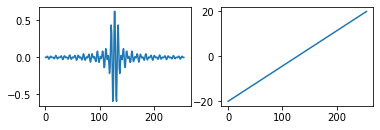

In [84]:
w = 'shan'
w = pywt.ContinuousWavelet(w)
dir(w)
for i in range(0, len(w.wavefun())):
    index = i+1
    pylab.subplot(2,2,index)
    pylab.plot(w.wavefun()[i])
fig.show()

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  
c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


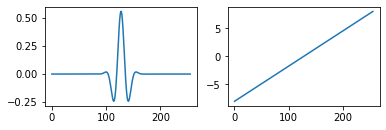

In [85]:
w = 'cmor'
w = pywt.ContinuousWavelet(w)
dir(w)
for i in range(0, len(w.wavefun())):
    index = i+1
    pylab.subplot(2,2,index)
    pylab.plot(w.wavefun()[i])
fig.show()

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Wavelets of family fbsp, without parameters specified in the name are deprecated.  The name should take the form fbspM-B-C where M is the spline order and B, C are floats representing the bandwidth frequency and center frequency, respectively (example: fbsp1-1.5-1.0).
  
c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


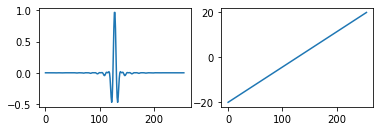

In [86]:
w = 'fbsp'
w = pywt.ContinuousWavelet(w)
dir(w)
for i in range(0, len(w.wavefun())):
    index = i+1
    pylab.subplot(2,2,index)
    pylab.plot(w.wavefun()[i])
fig.show()

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


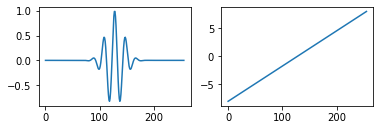

In [87]:
w = 'morl'
w = pywt.ContinuousWavelet(w)
dir(w)
for i in range(0, len(w.wavefun())):
    index = i+1
    pylab.subplot(2,2,index)
    pylab.plot(w.wavefun()[i])
fig.show()

## Questions:

Sometimes the function wavefun() shows several functions. In the case of the haar wavelet, the first one is the low-pass filter and the second one is the actual haar wavelet. But there is a third one. What does the third one represent? How do you tell which plot represents what?

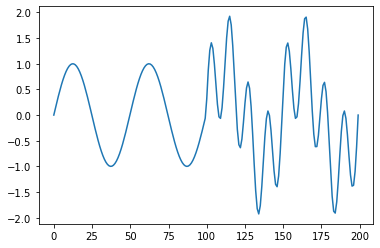

In [88]:
plt.plot(signal_mixed_half)

In [89]:
dwt = pywt.dwt(signal_mixed_half,15,wavelet=w)

TypeError: dwt() got multiple values for argument 'wavelet'

In [ ]:
import pywt
def decomposite(signal, coef_type='d', wname='db6', level=9):
    w = pywt.Wavelet(wname)
    a = signal
    ca = []
    cd = []
    for i in range(level):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        cd.append(d)
    rec_a = []
    rec_d = []
    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))
    for i, coeff in enumerate(cd):
        coeff_list = [None, coeff] + [None] * i
        rec_d.append(pywt.waverec(coeff_list, w))
    if coef_type == 'd':
        return rec_d
    return rec_a

In [ ]:
X = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
rec_d = decomposite(X, 'd', 'db6', level=9)
# slice rec_d
rec_d

In [ ]:
print(len(X))
print(len(rec_d[6]))